# Just exploring some potential datasets

## Things to add
- Outlier removal
- Correlated columns
- Balance datasets?

## 
- Unsupervised classifiers Kmeans, 
- Ordinal encoding labels
- Tensorboard logging

In [243]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import mode

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

#list_avaliable_datasets()

In [244]:
# Dataset that seems useful
dataset_id = {"iris": 53, # Seem ok 
              "heart_disease": 45, # Seems ok
              "wine_quality": 186, # Seems ok
              "breast_cancer_wisconsin": 17, # Seems ok
              "car_evaluation": 19, # Seems ok, but might have some highly correlated columns # Maybe in article?
              "abalone": 1, # Seems ok, 1 outlier in height?
              "mushroom": 73, # Seems ok, only categorical data, missing values
              "statlog" : 144, # Seems ok, lots of categorical data
              "credit_approval" : 27, # Seems ok # Maybe in article?
              "banknote_authentication" : 267, # Seems ok # Maybe in article?
              "zoo" : 111, # Seems ok, almost only binominal data
              "raisins" : 850, # Seems ok # Not in article?
              "maternal_health_risk" : 863, # Seems ok # Not in article?
              "balance_scale" : 12, # Seems ok
              "land_mines" : 763, # Not in artcile?
              "hcv" : 571, # Not in Article?
              "ilpd" : 225,
              "acute_inflamations" : 184,
              "ecoli" : 39,
              "mammographic_mass" : 161,
              "hayes_roth" : 44
              }
TEST_SIZE = 0.2
RANDOM_SEED = 42
K_FOLDS = 3

# Load data

### Turn categorical features into numerical

In [245]:
def encode_categorical_features(X, encoder):
    X = encoder.fit_transform(X)
    return X

In [246]:
def import_dataset(uci_id, encoder):
    dataset = fetch_ucirepo(id=uci_id) 
    print(dataset.metadata)
    data_types = dataset.variables["type"]
    data_names = dataset.variables["name"]
    data_roles = dataset.variables["role"]
    X = dataset.data.features
    y = dataset.data.targets
    print(data_names)
    print("Column names in X:", X.columns.tolist())
    categorical_columns = []
    #categorical_columns = [data_names[i] for i, type in enumerate(data_types) if (type == "Categorical" or type == "Binary") and data_names[i] != "class"]
    for i, type in enumerate(data_types):
        # print(data_names[i], type, data_roles[i])
        if (type == "Categorical" or type == "Binary") and data_names[i] != "class" and data_roles[i] == "Feature":
            categorical_columns.append(data_names[i])
    # Encode catorical features
    X.loc[:, categorical_columns] = encode_categorical_features(X[categorical_columns], encoder)
    # Remove rows with missing values
    X = X.dropna()
    y = y.loc[X.index]
    return X, y


In [247]:
ordinal_encoder = OrdinalEncoder()
X, y = import_dataset(dataset_id["zoo"], ordinal_encoder)
#print(type(X))
#print(y)
#print(X)
y = encode_categorical_features(y, ordinal_encoder)

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

/var/folders/s9/bg_8ddhj38x2g3svq29mlmcc0000gn/T/ipykernel_12024/3720503759.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, categorical_columns] = encode_categorical_features(X[categorical_columns], encoder)


# Train test split

In [248]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

## Cross validation

In [249]:
log_reg = LogisticRegression(max_iter=1000)

# Ravel to convert from (len, 1) shape to (len,), warning from sk-learn
Y_train = np.ravel(Y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

scores = cross_val_score(
    log_reg, X_scaled, Y_train, scoring='accuracy', cv=5)
# accuracy
print('Accuracy: %.3f ,\nStandard Deviations :%.3f' %
      (np.mean(scores), np.std(scores)))

#TODO check if this is better implementation
# k_folds  = KFold(n_splits=K_FOLDS)
# for train_idx, valid_idx in k_folds.split(X_train):
#     continue

Accuracy: 0.963 ,
Standard Deviations :0.050


/Users/emillundin/anaconda3/envs/D7041EMiniProject/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [250]:
# Testing importing the first 25 UCI datasets
# for i in range(1, 25):
#     try:
#         X, y = import_dataset(i, ordinal_encoder)
#     except Exception as e:
#         if "DatasetNotFoundError" in str(type(e)):
#             print(f"Dataset {i} is not available for import. Skipping. Error: {str(e)}")
#         else:
#             print(f"An unexpected error occurred with dataset {i}: {str(e)}")

## For logging


In [251]:
train_acc_dict = {}
train_f1_dict = {}
test_acc_dict = {}
test_f1_dict = {}

In [252]:
def kmeans_classification(X_train, y_train, X_test):
    # get the amount of clusters
    n_clusters = len(np.unique(y_train))
    # create k-means classifier
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)

    # normalize train data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    kmeans.fit(X_train)

    cluster_labels = kmeans.predict(X_train)
    labels_map = {}
    # loops through all cluster labels
    for cluster in np.unique(cluster_labels):
        class_label = mode(Y_train[cluster_labels == cluster])[0] # selects the most common label for that cluster
        labels_map[cluster] = class_label # map that label to the cluster

    y_pred_train = np.array([labels_map[cluster] for cluster in cluster_labels]) # maps cluster to labels

    # normalize test data using train data mean and std
    X_test = scaler.transform(X_test)

    # predict and map for test set
    test_clusters = kmeans.predict(X_test)
    y_pred_test = np.array([labels_map[cluster] for cluster in test_clusters])

    return y_pred_train, y_pred_test

kmeans_classification(X_train, Y_train, X_test)

(array([4., 4., 6., 0., 6., 6., 6., 0., 0., 1., 4., 0., 0., 1., 0., 0., 6.,
        0., 1., 6., 3., 3., 1., 3., 0., 3., 0., 4., 4., 0., 6., 6., 0., 0.,
        3., 3., 1., 0., 0., 0., 6., 1., 1., 0., 0., 0., 6., 0., 3., 0., 4.,
        1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 6., 1., 0., 0., 4., 1., 3.,
        1., 1., 6., 0., 3., 3., 1., 3., 1., 6., 3., 6.]),
 array([0., 0., 3., 0., 0., 6., 0., 0., 0., 0., 3., 6., 6., 1., 6., 0., 0.,
        1., 3., 0., 4.]))

In [253]:
def test_classifier(clf, clf_name, params, X_train, y_train, X_test, y_test):
    labels = np.unique(y_train)
    if clf_name == "kmeans":
        y_pred_train, y_pred_test = kmeans_classification(X_train, y_train, X_test)
    else:
        # https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
        pipe = Pipeline([('scaler', StandardScaler()), (clf_name, clf)])
        scoring = 'accuracy'
        gs_knn = GridSearchCV(pipe,
                            param_grid=params,
                            scoring=scoring,
                            cv=5)

        # Ravel to convert from (len, 1) shape to (len,), warning from sk-learn
        y_train = np.ravel(y_train)

        gs_knn.fit(X_train, y_train)
        print(gs_knn.best_params_)
        # find best model score
        y_pred_train = gs_knn.best_estimator_.predict(X_train)
        y_pred_test = gs_knn.best_estimator_.predict(X_test)


    train_acc = accuracy_score(y_train, y_pred_train)
    # TODO
    train_f1 = f1_score(y_train, y_pred_train, average="weighted")
    #train_score = gs_knn.score(X_train, y_train)

    # test on test set
    test_acc = accuracy_score(y_test, y_pred_test)
    # TODO
    test_f1 = f1_score(y_test, y_pred_test, average="weighted")
    #test_score = gs_knn.score(X_test, y_test)

    print(f"{clf_name}, Train accuracy = {train_acc}, Test accuracy = {test_acc}")
    print(f"{clf_name}, Train f1-score = {train_f1}, Test f1-score = {test_f1}")

    # Confusion Matrix
    print("Confusion Matrix for train set")
    cm_train = confusion_matrix(y_train, y_pred_train, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
    disp.plot()
    plt.show()

    print("Confusion Matrix for test set")
    cm_test = confusion_matrix(y_test, y_pred_test, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
    disp.plot()
    plt.show()

    # writer.add_scalar(f"{clf_name} test f1", test_f1)
    # writer.add_scalar(f"{clf_name} train f1", train_f1)
    # writer.add_scalar(f"{clf_name} test accuracy", test_acc)
    # writer.add_scalar(f"{clf_name} train accuracy", train_acc)
    # writer.add_text("abc test here",f"Name: {clf_name}\nTrainset {0}")
    train_acc_dict[clf_name] = train_acc
    train_f1_dict[clf_name] = train_f1
    test_acc_dict[clf_name] = test_acc
    test_f1_dict[clf_name] = test_f1
    # writer.add_scalars(clf_name, {"Train acc": train_acc,
    #                              "Test acc": test_acc,
    #                              "Train f1" : train_f1,
    #                              "Test f1" : test_f1
    #                              })
    #writer.flush()

# K-means for classification

kmeans, Train accuracy = 0.8625, Test accuracy = 0.7619047619047619
kmeans, Train f1-score = 0.8186403199203541, Test f1-score = 0.7370600414078675
Confusion Matrix for train set


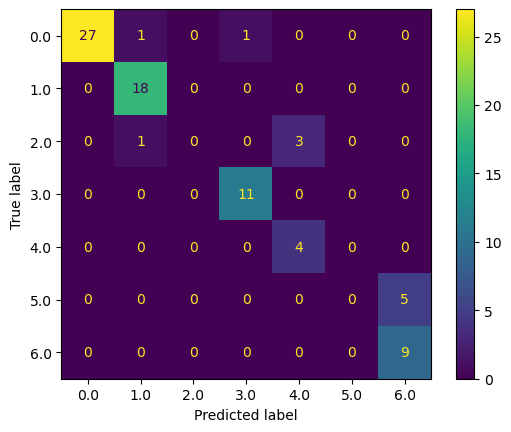

Confusion Matrix for test set


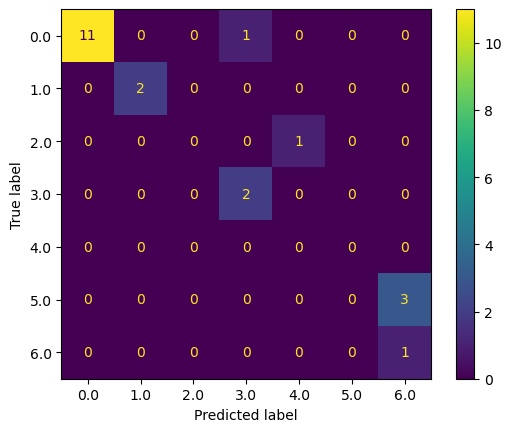

In [254]:
n_clusters = len(np.unique(Y_train))
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
params = [{"n_clusters": [n_clusters]}]

test_classifier(kmeans, "kmeans", params, X_train, Y_train, X_test, Y_test)

/Users/emillundin/anaconda3/envs/D7041EMiniProject/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
knn, Train accuracy = 1.0, Test accuracy = 0.9523809523809523
knn, Train f1-score = 1.0, Test f1-score = 0.9333333333333333
Confusion Matrix for train set


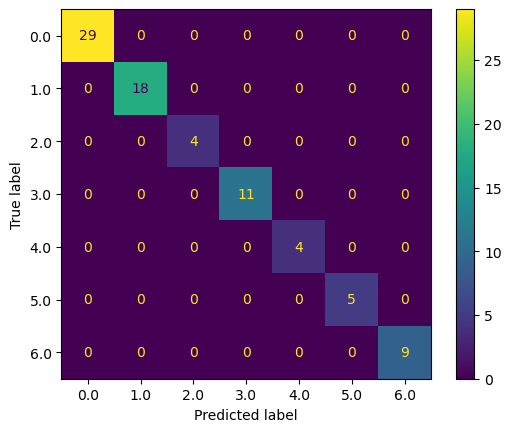

Confusion Matrix for test set


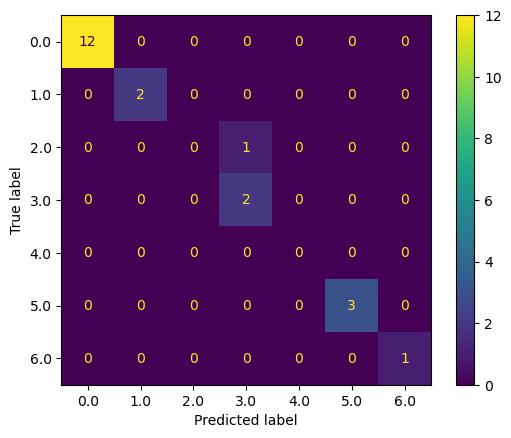

In [255]:
knn = KNeighborsClassifier()
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

test_classifier(knn, "knn", params, X_train, Y_train, X_test, Y_test)
writer.add_scalars("Train acc", train_acc_dict)
writer.add_scalars("Test acc", test_acc_dict)
writer.add_scalars("Train f1", train_f1_dict)
writer.add_scalars("Test f1", test_f1_dict)
writer.close()